In [1]:
using HarmonicBalance 

In [2]:
@variables ω0,γ,Ω1,Ω2,α,F,θ1,θ2,m, t, T, Ω3, η, x(t)

natural_equation =  d(d(x,t),t) +γ*d(x,t) + ω0^2*x + α*x^3
forces =   F*(1+m*cos(Ω1*t+θ1))*cos(Ω2*t+θ2)
dEOM = DifferentialEquation(natural_equation + forces, x)
add_harmonic!(dEOM, x, [Ω2-Ω1,Ω2,Ω1+Ω2])

System of 1 differential equations
Variables:       x(t)
Harmonic ansatz: x(t) => Ω2 - Ω1, Ω2, Ω1 + Ω2;   

α*(x(t)^3) + (ω0^2)*x(t) + γ*Differential(t)(x(t)) + F*(1 + m*cos(θ1 + t*Ω1))*cos(θ2 + t*Ω2) + Differential(t)(Differential(t)(x(t))) ~ 0


In [3]:
# perform all the averaging steps
@time averagedEOM = get_harmonic_equations(dEOM, fast_time=t, slow_time=T)

109.623099 seconds (196.52 M allocations: 10.719 GiB, 3.74% gc time, 92.77% compilation time)


A set of 6 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T), u3(T), v3(T)
Parameters: Ω2, Ω1, ω0, α, γ, F, m, θ1, θ2

Harmonic ansatz: 
x(t) = u1*cos(Ω2 - Ω1t) + v1*sin(Ω2 - Ω1t) + u2*cos(Ω2t) + v2*sin(Ω2t) + u3*cos(Ω1 + Ω2t) + v3*sin(Ω1 + Ω2t)

Harmonic equations:

(ω0^2)*u1(T) + γ*Differential(T)(u1(T)) + (2//1)*Ω2*Differential(T)(v1(T)) + (3//4)*α*(u1(T)^3) + Ω2*γ*v1(T) + (2//1)*Ω1*Ω2*u1(T) + (3//4)*α*(v1(T)^2)*u1(T) + (3//2)*α*(u2(T)^2)*u1(T) + (3//2)*α*(u3(T)^2)*u1(T) + (3//4)*α*(u2(T)^2)*u3(T) + (3//2)*α*(v2(T)^2)*u1(T) + (3//2)*α*(v3(T)^2)*u1(T) + (1//2)*F*m*cos(θ1 - θ2) + (3//2)*α*u2(T)*v2(T)*v3(T) - (2//1)*Ω1*Differential(T)(v1(T)) - (Ω1^2)*u1(T) - (Ω2^2)*u1(T) - Ω1*γ*v1(T) - (3//4)*α*(v2(T)^2)*u3(T) ~ 0

γ*Differential(T)(v1(T)) + (ω0^2)*v1(T) + (2//1)*Ω1*Differential(T)(u1(T)) + (3//4)*α*(v1(T)^3) + Ω1*γ*u1(T) + (3//4)*α*(u1(T)^2)*v1(T) + (2//1)*Ω1*Ω2*v1(T) + (1//2)*F*m*sin(θ1 - θ2) + (3//4)*α*(v2(T)^2)*v3(T) + (3//2)*α*(u2(T)^2)*v1(T) + (3//2)*α*(u3(T)^2)*v1(T) + (3

In [4]:
# define the steady state problem
@time problem = Problem(averagedEOM, explicit_Jacobian=true)

 16.326434 seconds (20.14 M allocations: 1.125 GiB, 1.90% gc time, 98.68% compilation time)


6 algebraic equations for steady states
Variables: u1, v1, u2, v2, u3, v3
Parameters: Ω2, Ω1, ω0, α, γ, F, m, θ1, θ2
Symbolic Jacobian: true


## Define parameter to sweep and calculate solutions

In [5]:
range = Ω1 => LinRange(-4,4,60) .+ 1
fixed = (α => 1., γ => 1E-2, ω0 => 1., Ω2 => 0.5, F=> 0.5, m => 1., θ1 => 0., θ2 => 0.)

@time soln = get_steady_states(problem, range, fixed, random_warmup=true)

Solving for 60 parameters... 100%|██████████████████████| Time: 0:00:00
  # parameters solved:  60
  # paths tracked:      2700
 74.366985 seconds (95.15 M allocations: 5.000 GiB, 2.71% gc time, 96.63% compilation time)


A steady state result for 60 parameter points

Solution branches:   45
   of which real:    9
   of which stable:  6

Classes: stable, physical, Hopf, binary_labels


## Plot functions of the solution

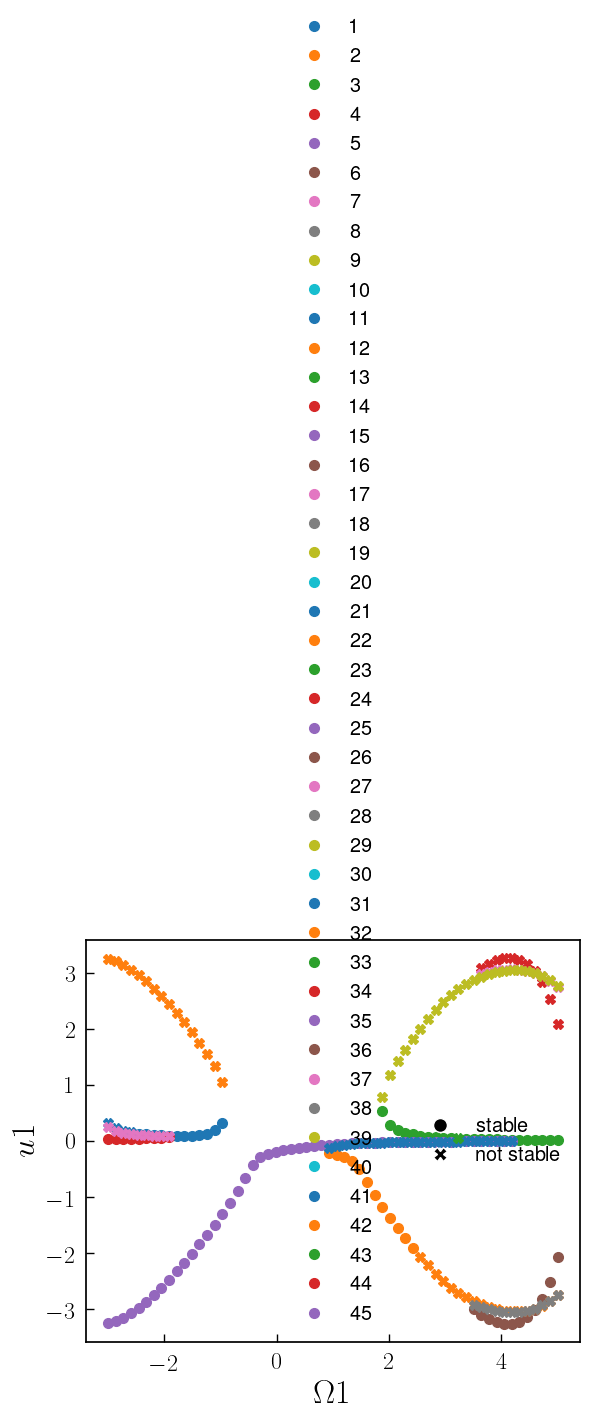

In [10]:
plot_1D_solutions(soln, x="Ω1", y="u1");

## spectrum

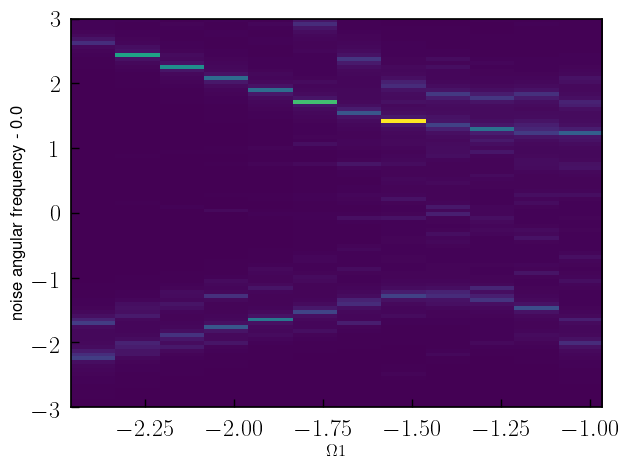

PyObject <matplotlib.image.AxesImage object at 0x7fa412d08730>

In [7]:
HarmonicBalance.plot_jacobian_spectrum(soln, x, Ω_range=LinRange(-3,3,100), branch=1)

# Solving for a  two-parameter sweep

In [8]:
range_2D = (Ω2 => LinRange(0.6,1.4,50), F => LinRange(0.01,0.4,50))
fixed_2D = (γ => 1E-2, ω0 => 1., Ω1 => 0.1, α=> 1., m => 0.1, θ1 => 0., θ2 => 0.)

@time soln_2D = get_steady_states(problem, range_2D, fixed_2D,sorting="naive",random_warmup=true)

Solving for 2500 parameters... 100%|████████████████████| Time: 0:00:41
  # parameters solved:  2500
  # paths tracked:      112500
 57.753447 seconds (282.30 M allocations: 10.706 GiB, 5.45% gc time, 9.44% compilation time)


A steady state result for 2500 parameter points

Solution branches:   45
   of which real:    11
   of which stable:  8

Classes: stable, physical, Hopf, binary_labels


In [12]:
plot_2D_phase_diagram_interactive(soln_2D, stable=true, nrows=3,ncols=3,cut_dim="1",cut_type="solutions",observable="nsols")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/hrochan/.julia/packages/PyCall/3fwVL/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'NoneType' object has no attribute 'get_array'")
  File "/usr/lib/python3/dist-packages/matplotlib/figure.py", line 2215, in colorbar
    cb = cbar.colorbar_factory(cax, mappable, **cb_kw)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1640, in colorbar_factory
    cb = Colorbar(cax, mappable, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1158, in __init__
    if mappable.get_array() is not None:


In [11]:
plot_2D_phase_diagram_interactive(soln_2D, stable=false, nrows=3, ncols=3,cut_dim="1",cut_type="solutions",observable="nsols")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/hrochan/.julia/packages/PyCall/3fwVL/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'NoneType' object has no attribute 'get_array'")
  File "/usr/lib/python3/dist-packages/matplotlib/figure.py", line 2215, in colorbar
    cb = cbar.colorbar_factory(cax, mappable, **cb_kw)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1640, in colorbar_factory
    cb = Colorbar(cax, mappable, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1158, in __init__
    if mappable.get_array() is not None:
